## 1. Data Preparation

Zuerst wird pandas und numpy importiert.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as st
import os

Danach wird der Datensatz importiert wobei zu beachten ist, dass das Trennzeichen ein Semikolon ist.

In [2]:
shopping_data = pd.read_csv('03_Assignment_data.csv', delimiter = ";")

Danach wird die Funktion .info() verwendet um einen Überblick über die Spalten und deren Datentyp zu erhalten.

In [3]:
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   Year_of_Birth          2240 non-null   int64  
 2   Highest_Qualification  2240 non-null   object 
 3   Marital_Status         2240 non-null   object 
 4   Income                 2216 non-null   float64
 5   Kids_home              2240 non-null   int64  
 6   Teen_home              2240 non-null   int64  
 7   Amount_Wines           2240 non-null   int64  
 8   Amount_Fruits          2240 non-null   int64  
 9   Amount_Beers           2240 non-null   int64  
 10  Amount_Meat            2240 non-null   int64  
 11  Amount_Vegetables      2240 non-null   int64  
 12  Amount_Fish            2240 non-null   int64  
 13  No._WebPurchases       2240 non-null   int64  
 14  No._CatalogPurchases   2240 non-null   int64  
 15  No._

### Data Cleaning
Danach schauen wir ob es Missing Values gibt durch die Verwendung der isna().sum() Funktion.

In [4]:
shopping_data.isna().sum()

ID                        0
Year_of_Birth             0
Highest_Qualification     0
Marital_Status            0
Income                   24
Kids_home                 0
Teen_home                 0
Amount_Wines              0
Amount_Fruits             0
Amount_Beers              0
Amount_Meat               0
Amount_Vegetables         0
Amount_Fish               0
No._WebPurchases          0
No._CatalogPurchases      0
No._StorePurchases        0
AcceptedCmp2              0
dtype: int64

In [5]:
missing_income = shopping_data[shopping_data['Income'].isna()]
print(missing_income.describe())

                 ID  Year_of_Birth  Income  Kids_home  Teen_home  \
count     24.000000      24.000000     0.0  24.000000  24.000000   
mean    5943.625000    1967.458333     NaN   0.666667   0.583333   
std     3028.349268      12.021644     NaN   0.637022   0.583592   
min     1295.000000    1943.000000     NaN   0.000000   0.000000   
25%     3063.250000    1957.750000     NaN   0.000000   0.000000   
50%     5526.500000    1969.500000     NaN   1.000000   1.000000   
75%     8597.750000    1974.250000     NaN   1.000000   1.000000   
max    10629.000000    1989.000000     NaN   2.000000   2.000000   

       Amount_Wines  Amount_Fruits  Amount_Beers  Amount_Meat  \
count     24.000000      24.000000     24.000000    24.000000   
mean     197.208333      21.333333    162.708333    27.166667   
std      242.479758      38.310705    339.420411    41.281290   
min        5.000000       0.000000      3.000000     0.000000   
25%       22.000000       1.000000     14.500000     2.000000 

Es lässt sich kein Muster erkennen bei den fehlenden Einkommen. Natürlich könnten es Mütter sein die wegen der Kinder nicht mehr arbeiten, aber es gibt auch Haushalte die keine Kinder haben. Zur einfachen weiterverarbeitung werden die fehlden Werte entfernt.

Hinzukommt, dass ersichtlich wird, dass es beim Bier jemanden gibt der sehr viel ausgegeben hat, was etwas unrealistisch erscheint und die zahlen etwas verfälscht. Diesen schauen wir uns auch noch an.

In [6]:
too_high = shopping_data[shopping_data['Amount_Beers'] > 1000]
print(too_high)

        ID  Year_of_Birth Highest_Qualification Marital_Status    Income  \
21    5376           1979            Graduation        Married    2447.0   
164   8475           1973                   PhD        Married  157243.0   
687   1501           1982                   PhD        Married  160803.0   
1653  4931           1977            Graduation       Together  157146.0   
2228  8720           1978              2n Cycle       Together       NaN   

      Kids_home  Teen_home  Amount_Wines  Amount_Fruits  Amount_Beers  \
21            1          0             1              1          1725   
164           0          1            20              2          1582   
687           0          0            55             16          1622   
1653          0          0             1              0          1725   
2228          0          0            32              2          1607   

      Amount_Meat  Amount_Vegetables  Amount_Fish  No._WebPurchases  \
21              1                

Derjenige der 1725 Dollar für Bier ausgegeben hat, ist vom Einkommen her an der Unteren Grenze, die anderen sind jedoch wesentlich höher. Deswegen wird diser eine Datenstz für weitere Analysena aus dem Datensatz genommen.

In [7]:
shopping_data_clean = shopping_data.dropna()
shopping_data_clean = shopping_data_clean[shopping_data_clean['ID'] != 5376]
shopping_data_clean.isna().sum()

ID                       0
Year_of_Birth            0
Highest_Qualification    0
Marital_Status           0
Income                   0
Kids_home                0
Teen_home                0
Amount_Wines             0
Amount_Fruits            0
Amount_Beers             0
Amount_Meat              0
Amount_Vegetables        0
Amount_Fish              0
No._WebPurchases         0
No._CatalogPurchases     0
No._StorePurchases       0
AcceptedCmp2             0
dtype: int64

Als nächstes wird der Datensatz auf Duplikate überprüft.

In [8]:
shopping_data_clean.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2215, dtype: bool

Es sind keine Duplikate enthalten.
Nun describen wir nochmal die Age Spalte falls noch falsche Daten darin enthalten wären.

In [9]:
shopping_data_clean["Year_of_Birth"].describe()

count    2215.000000
mean     1968.815801
std        11.986307
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_of_Birth, dtype: float64

Dabei fällt auf das es Geburtsjahre gibt die nicht möglich sind - nämlich das min 1893. Wir lassen nun als Geburtsjahre vor 19

In [10]:
shopping_data_clean[shopping_data_clean["Year_of_Birth"] <= 1920]

,ID,Year_of_Birth,Highest_Qualification,Marital_Status,Income,Kids_home,Teen_home,Amount_Wines,Amount_Fruits,Amount_Beers,Amount_Meat,Amount_Vegetables,Amount_Fish,No._WebPurchases,No._CatalogPurchases,No._StorePurchases,AcceptedCmp2
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,15,6,8,7,4,25,2,1,2,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,8,0,5,7,0,2,1,0,2,0
339,1150,1899,PhD,Together,83532.0,0,0,755,144,562,104,64,224,4,6,4,0


Es gibt 3 Geburtsjahre die nicht richtig sein können, da es keinen Personen auf der Welt gibt die dieses Alter momentan haben, diese werden im nächsten Schritt auch entfernt.

In [11]:
shopping_data_clean = shopping_data_clean[shopping_data_clean["Year_of_Birth"] > 1900]
shopping_data_clean["Year_of_Birth"].describe()

count    2212.000000
mean     1968.912749
std        11.700896
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_of_Birth, dtype: float64

### Data Transformation

**Change the data in Martial_Status as follows:
o 'Married’, 'Together' should be labeled 'Relationship'
o 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' should be labeled 'Single'**

Dafür wird die replace Funktion verwendet mit der sich sehr einfach Werte ersetzen lasse.

**Add a new column ‘kids’, which is indicates if the customer has kids or teens**

Hier wird die Funktion np.where benutzt und dann durch eine 1 impliziert, dass der Kunde Kinder oder Teenager hat und durch eine 0 dass er keine Hat.

**Add a new column ‘revenue’ which is the sum of 'Amount_Wines', 'Amount_Fruits',
'Amount_Beers', 'Amount_Meat', 'Amount_Vegetables', 'Amount_Fish' **

Hierfür werden die Entsprechenden Spalten einfach aufsummiert durch ein +.

In [12]:
shopping_data_clean = shopping_data_clean.replace(['Married','Together'],'Relationship')
shopping_data_clean = shopping_data_clean.replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

shopping_data_clean['kids'] = np.where((shopping_data_clean['Kids_home'] > 0) | (shopping_data_clean['Teen_home'] > 0) , "kid" ,"no_kid")

shopping_data_clean['revenue'] = shopping_data_clean['Amount_Wines'] + shopping_data_clean['Amount_Fruits'] + shopping_data_clean['Amount_Beers'] + shopping_data_clean['Amount_Meat'] + shopping_data_clean['Amount_Vegetables'] + shopping_data_clean['Amount_Fish']
print(shopping_data.describe())

                 ID  Year_of_Birth         Income    Kids_home    Teen_home  \
count   2240.000000    2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821    1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198      11.984069   25173.076661     0.538398     0.544538   
min        0.000000    1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000    1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000    1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000    1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000    1996.000000  666666.000000     2.000000     2.000000   

       Amount_Wines  Amount_Fruits  Amount_Beers  Amount_Meat  \
count   2240.000000    2240.000000   2240.000000  2240.000000   
mean     303.935714      26.302232    166.950000    37.525446   
std      336.597393      39.773434    225.715373    54.628979   
min        0.000000       0.

## 2. Data Visualization

Visualize the distribution of customers according to their Marital_Status using one
appropriate chart. Describe and interpret the results.

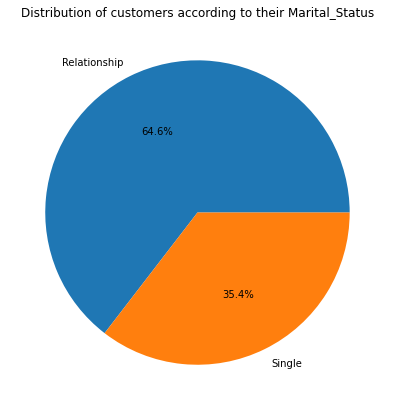

In [13]:
data = shopping_data_clean.groupby(['Marital_Status'])['ID'].count()
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels=['Relationship', 'Single'], autopct='%1.1f%%')
plt.title("Distribution of customers according to their Marital_Status")
plt.show()

Zur Darstellung der Verteilung von Kunden wurde ein Pie Cart gewählt. Hierbei wir erischtlich, dass die Anzahl an Kunden. welche in einer Beziehung sind  wesentlich höher ist -fast dopplet so hoch - als diejenigen die Single sind.

Visualize the distribution of the customer’s income according to their 'Marital_Status'
using one appropriate chart. Describe and interpret the results.

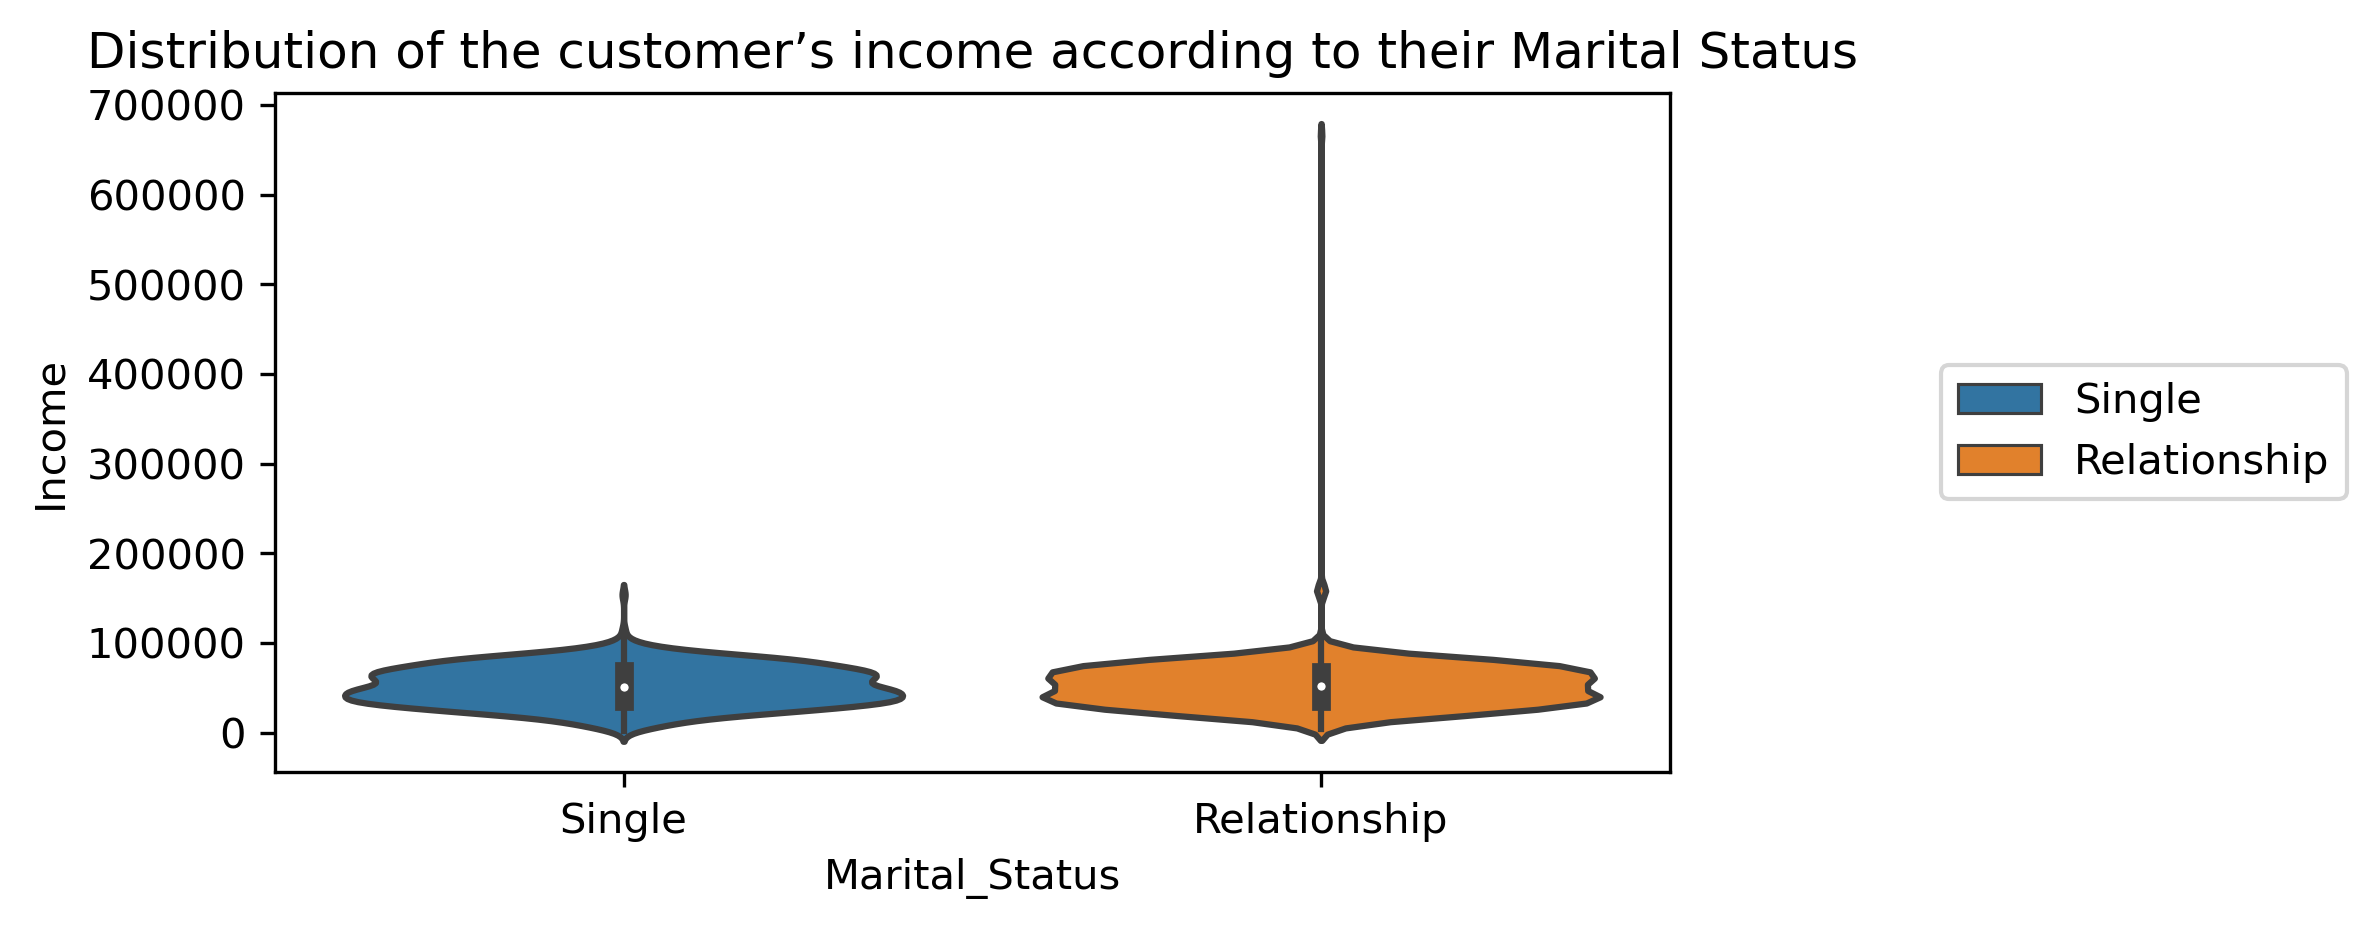

In [14]:
plt.figure(figsize=(6,3), dpi = 300)

ax2 = sns.violinplot(data=shopping_data_clean, x="Marital_Status", y= "Income", hue = "Marital_Status", dodge=False)
ax2.set_title("Distribution of the customer’s income according to their Marital Status")
ax2.set_xlabel("Marital_Status")
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)

Zur Visualisierung wurde ein Violinplot verwendet, in welchen zu einem weiteren Schritt weiter hineingezoomt wurde. Die Verteilung des Einkommens ist fast identisch, egal ob es sich um um Personen in Beziehungen oder als Single handelt. Bei den Kunden in Beziehungen gibt es nur eine Kunden mit sehr hohem Einkommen.

Visualize the distribution of the revenue for customers with kids and without kids using
one appropriate chart. Describe and interpret the results.

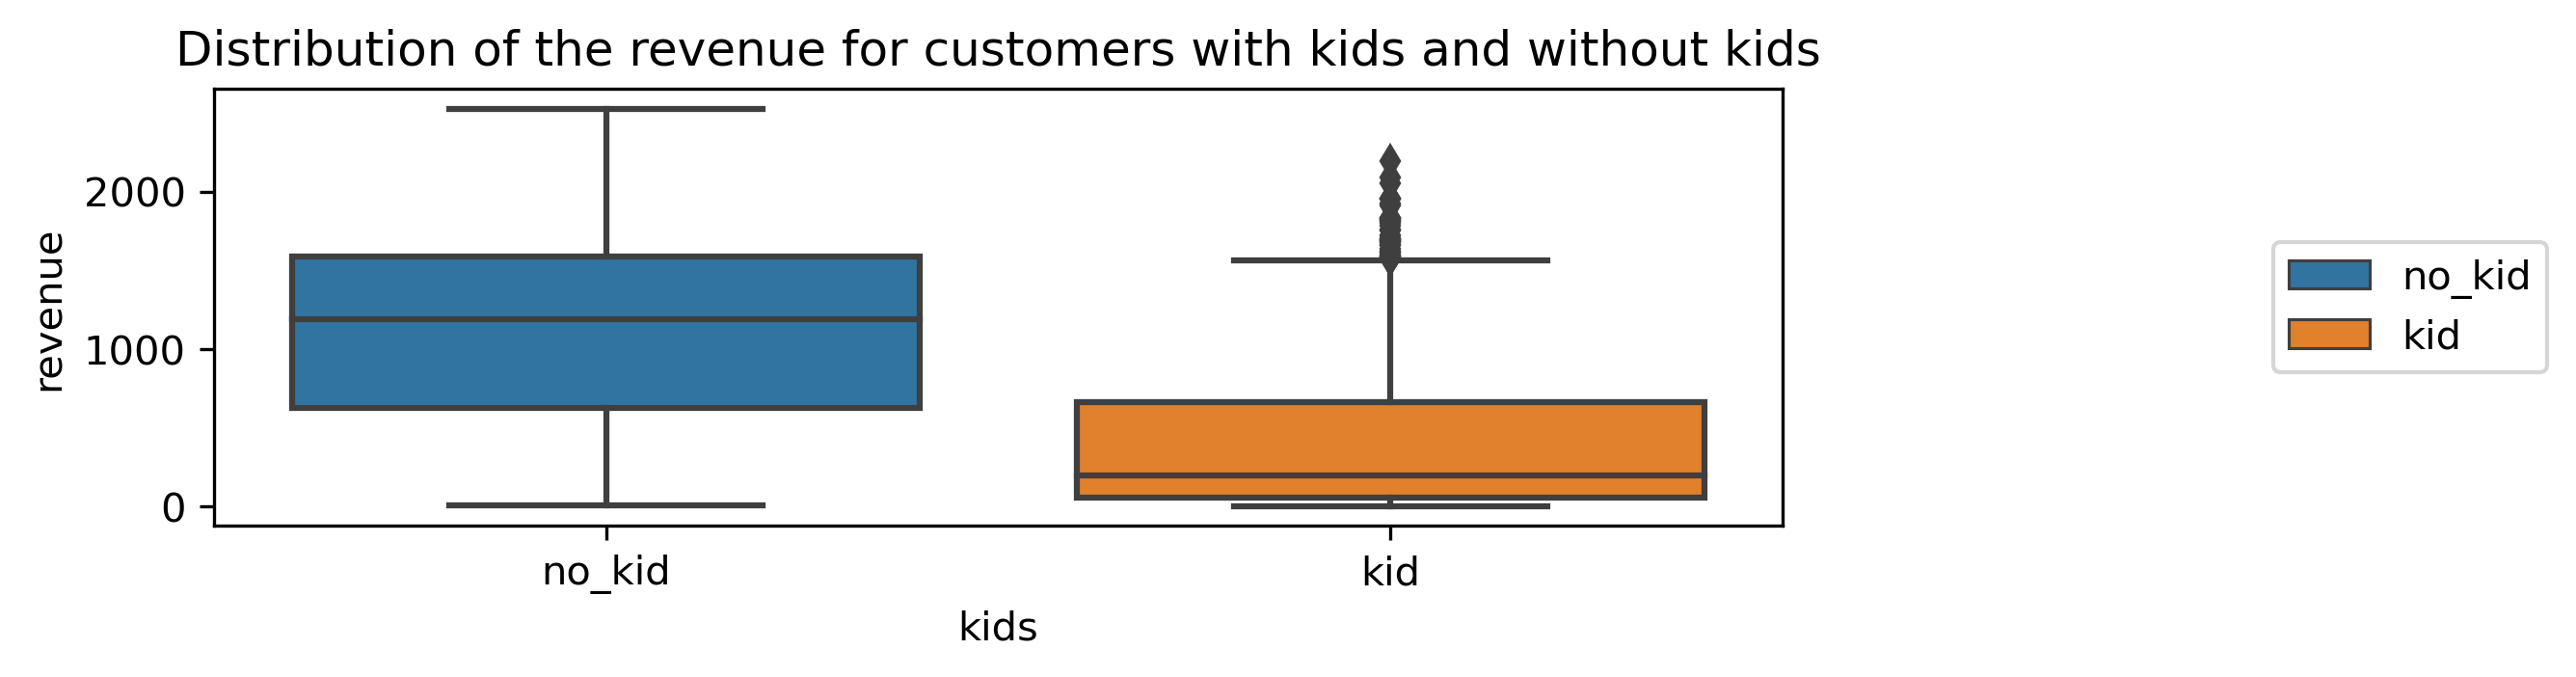

In [15]:
plt.figure(figsize=(7,2), dpi = 300)

ax2 = sns.boxplot(data=shopping_data_clean, x="kids", y= "revenue", hue = "kids", dodge=False)
ax2.set_title("Distribution of the revenue for customers with kids and without kids")
ax2.set_xlabel("kids")
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)

Zur Visualierung wurde ein Boxplot verwendet. Hier ist gut zu sehen das Kunden mit Kindern weniger Geld ausgeben als Kunden ohne Kinder. Kinder kosten generell mehr Geld deswegen könnte es gut sein, dass dort dann gespart wird beim Einkauf. Auch könnte es sein, dass es ein etwas teuerer Supermarkt ist. So sind auch wesentlch mehr Kunden mit Kindern als ohne Vorhanden was das Bild verrren könnte.

## 3. Hypothesis testing

#### 3.1 Geben Kunden mit Kindern mehr aus als Kunden ohne Kinder?

Die Datenvisualiserung hat gezeigt, dass Kunden mit Kindern durchschnittlich weniger ausgeben als Kunden ohne Kinder. Als nächstes schauen wir uns einge Statistiken an um dies zu untersuchen.

In [16]:
shopping_data_clean.groupby("kids")['revenue'].sum()

kids
kid       643840
no_kid    697769
Name: revenue, dtype: int64

In [17]:
shopping_data_clean.groupby("kids")['revenue'].mean()

kids
kid        407.493671
no_kid    1104.064873
Name: revenue, dtype: float64

In [18]:
shopping_data_clean.groupby("kids")['revenue'].median()

kids
kid        198.0
no_kid    1188.5
Name: revenue, dtype: float64

In [19]:
shopping_data_clean.groupby("kids")['revenue'].std()

kids
kid       450.068658
no_kid    645.347328
Name: revenue, dtype: float64

Nach den Daten haben Kunden ohne Kinder den höheren Mean, Median und Standardabweichung. 

Nun untersuchen wir dies weiter, aber stellen die Hypothese auf das Kunden mit Kindern weniger ausgeben als ohne.

#### Voraussetzungen für den t-Test

##### 1. Normalverteilung
Wir können davon ausgehen, dass die Daten normalverteilt sind, da der Datensatz sehr groß ist.

##### 2. Homogenität der Varianz

Bevor wir den t-Test durchführen, müssen wir die Homogenität der Varianz überprüfen, da diese bestimmt, ob der t-Test oder der Welch-Test verwendet werden soll.

Levene-Test auf Homogenität der Varianz zwischen den Gruppen
- H0 für Levene-Test: Es besteht Homogenität der Varianz für beide Gruppen ("beide Gruppen haben ähnliche Varianz")
- H1 für Levene-Test: Es gibt keine Homogenität der Varianz für beide Gruppen ("beide Gruppen haben unterschiedliche Varianz")

In [20]:
from scipy.stats import levene

nokids = shopping_data_clean.loc[shopping_data_clean['kids'] == "no_kid", :]
kids = shopping_data_clean.loc[shopping_data_clean['kids'] == "kid", :]

stat, p = levene(kids.revenue, nokids.revenue, center="median")
stat, p

(118.61815057404763, 6.0596738198087835e-27)

Wir verwerfen H0, da der Levene-Test zeigt, dass keine Varianzhomogenität vorliegt: p < 0.001. 

Daher verwenden wir den Welch-Test anstelle des normalen t-Tests.

T-Test

H0: Kunden mit Kindern kaufen gleich viel wie Kunden ohne Kinder </br>
H1: Kunden ohne Kindern kaufen mehr als Kunden mit Kinders


In [21]:
from scipy.stats import ttest_ind

ttest_ind(kids.revenue, nokids.revenue, equal_var=False, alternative="two-sided")


Ttest_indResult(statistic=-24.827239441231363, pvalue=9.85522391949937e-104)

Da p < 0.001 lehnen wir H0 ab und akzeptieren H1 , dass Kunden ohne Kindern mehr ausgeben beim Einkauf mit einen mean von 1106 Dollar zu 406 Dollar.

#### 3.2 Gibt es signifikante Unterschiede bei den Einnahmen für die folgenden Kundengruppen?
- Kunden, die nur über die Website des Unternehmens eingekauft haben,
- Kunden, die nur direkt in den Geschäften des Unternehmens eingekauft haben
- Kunden, die nur über einen Katalog eingekauft haben
- Kunden, die aus mehr als einer Quelle eingekauft haben (Website, Geschäft, Katalog)

Dafür müssen wir zuerst eine neue Spalte erstellen die diese Information beinhaltet.

In [22]:
def categories_shopping(df):
    if (df['No._WebPurchases'] > 0 and df['No._CatalogPurchases'] == 0 and df['No._StorePurchases'] == 0):
        return "WebPurchases"
    elif (df['No._WebPurchases'] == 0 and df['No._CatalogPurchases'] > 0 and df['No._StorePurchases'] == 0):
        return "CatalogPurchases"
    elif (df['No._WebPurchases'] == 0 and df['No._CatalogPurchases'] == 0 and df['No._StorePurchases'] > 0):
        return "StorePurchases"
    else :
        return "MultiplePurchases"

shopping_data_clean['type_of_purchase'] = shopping_data_clean.apply(categories_shopping, axis = 1)

  Um diese Berechnung vorzunehmen bedarf es der ANOVA, da es sich um mehr als  Gruppen handelt. Davor wird der Sachverhalt aber zunächst graphisch dargestellt.

In [23]:
shopping_data_clean['type_of_purchase'] = pd.Categorical(shopping_data_clean['type_of_purchase'], ["WebPurchases", "CatalogPurchases", "StorePurchases", "MultiplePurchases"])

Text(0, 0.5, 'Revenue')

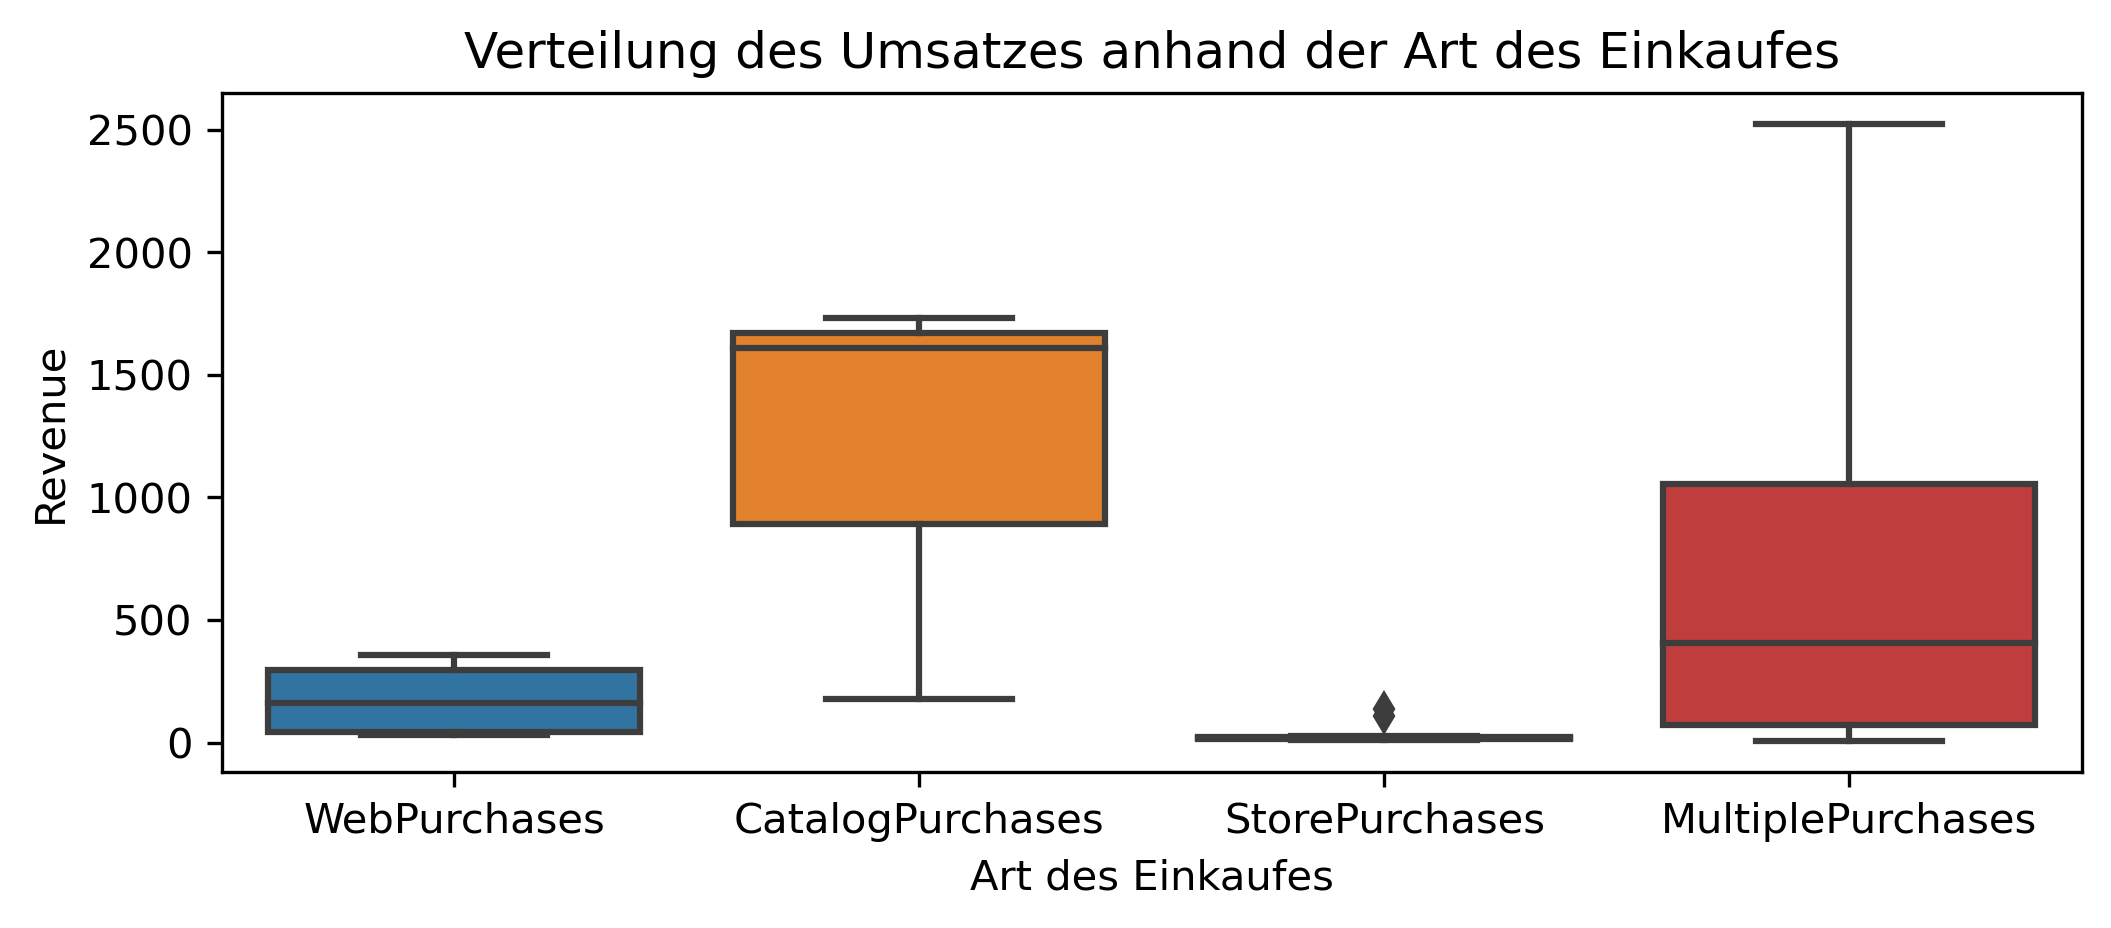

In [24]:
plt.figure(figsize=(8,3), dpi = 300)
ax2 = sns.boxplot(data=shopping_data_clean, x='type_of_purchase', y= "revenue", dodge=False)
ax2.set_title("Verteilung des Umsatzes anhand der Art des Einkaufes")
ax2.set_xlabel("Art des Einkaufes")
ax2.set_ylabel("Revenue")

Anhand der Grafik lässt sich erkennen, dass die neusten Einkäufe aus verschiedenen Quellen stammen. Dabei aber die nur Catalog Einkäufe den höchsten durchschnittlichen Revenue erzielen und die Kunden die nur um Store einkaufen den durchschnittlich niedrigesten Umsatz.

In [25]:
shopping_data_clean.groupby('type_of_purchase').revenue.count()

type_of_purchase
WebPurchases            4
CatalogPurchases        3
StorePurchases         30
MultiplePurchases    2175
Name: revenue, dtype: int64

In [26]:
shopping_data_clean.groupby('type_of_purchase').revenue.mean()

type_of_purchase
WebPurchases          179.250000
CatalogPurchases     1172.000000
StorePurchases         25.433333
MultiplePurchases     614.534713
Name: revenue, dtype: float64

In [27]:
shopping_data_clean.groupby('type_of_purchase').revenue.median()

type_of_purchase
WebPurchases          163.0
CatalogPurchases     1608.0
StorePurchases         19.5
MultiplePurchases     406.0
Name: revenue, dtype: float64

In [28]:
shopping_data_clean.groupby('type_of_purchase').revenue.std()

type_of_purchase
WebPurchases         163.821804
CatalogPurchases     862.987833
StorePurchases        26.896588
MultiplePurchases    602.099922
Name: revenue, dtype: float64

#### Voraussetzungen für den t-Test

##### 1. Normalverteilung
Wir können davon ausgehen, dass die Daten normalverteilt sind, da der Datensatz sehr groß ist.

##### 2. Homogenität der Varianz 
Bevor wir die ANOVA durchführen, müssen wir die Homogenität der Varianz überprüfen, da sie bestimmt, ob die ANOVA oder der Welch's F-Test verwendet werden soll.

Levene-Test für die Homogenität der Varianz zwischen den Gruppen
- H0 für Levene-Test: Es besteht Homogenität der Varianz für alle vier Gruppen 
- H1 für Levene-Test: Es gibt keine Homogenität der Varianz für alle vier Gruppen

In [29]:
shopping_Web = shopping_data_clean.loc[shopping_data_clean['type_of_purchase']== "WebPurchases", :]
shopping_Catalog = shopping_data_clean.loc[shopping_data_clean['type_of_purchase']== "CatalogPurchases", :]
shopping_Store = shopping_data_clean.loc[shopping_data_clean['type_of_purchase']== "StorePurchases", :]
shopping_Mulitple = shopping_data_clean.loc[shopping_data_clean['type_of_purchase']== "MultiplePurchases", :]

In [30]:
stat, p = levene(shopping_Web.revenue,shopping_Catalog.revenue, shopping_Store.revenue, shopping_Mulitple.revenue, center="median")
stat, p

(15.723885950149578, 4.0546086784201013e-10)

Wir verwerfen H0, da der Levene-Test zeigt, dass keine Varianzhomogenität vorliegt: F = 15,72 , p < 0,001 Daher verwenden wir den Welch's F-Test.

#### Welch's F-Test

- H0: Der durschnittliche Umsatz ist gleich für alle vier Kundengruppen. <br>
- H1: Es gibt einen Signifikanten unterschied im durschnittlichen Umsatz für alle vier Kundengruppen.

In [31]:
from statsmodels.stats.oneway import anova_oneway
anova_oneway(shopping_data_clean.revenue, shopping_data_clean.type_of_purchase, use_var = "unequal")

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 497.72816938322603
pvalue = 1.3729359393371535e-07
df = (3.0, 6.0089473877494735)
df_num = 3.0
df_denom = 6.0089473877494735
nobs_t = 2212.0
n_groups = 4
means = [1172.          614.53471264   25.43333333  179.25      ]
nobs = [   3. 2175.   30.    4.]
vars_ = [7.44748000e+05 3.62524316e+05 7.23426437e+02 2.68375833e+04]
use_var = unequal
welch_correction = True
tuple = (497.72816938322603, 1.3729359393371535e-07)

Es gab einen statistisch signifikanten Unterschied zwischen den Gruppen, wie der Welch-F-Test ergab (F = 497,72, p < 0,001). 
Wir verwerfen H0 und akzeptieren H1.
Es ist ersichtlich durch den Signifikanzwert unter 0.05, dass es eunen statischtisch signifikanten Unterschied zwischen den durschnittlichen Umsatz der verschiedenen Kundengruppen gibt. <br>
Um herauszufinden welche Gruppen sich unterscheiden wird der TukeyHSD post hoc test verwendet.

#### ANOVA TukeyHSD Post Hoc test

In [32]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=shopping_data_clean["revenue"], groups=shopping_data_clean["type_of_purchase"], alpha = 0.01)
print(tukey)

               Multiple Comparison of Means - Tukey HSD, FWER=0.01               
      group1            group2       meandiff  p-adj    lower      upper   reject
---------------------------------------------------------------------------------
 CatalogPurchases MultiplePurchases  -557.4653  0.372 -1634.4162  519.4856  False
 CatalogPurchases    StorePurchases -1146.5667 0.0085 -2275.3041  -17.8292   True
 CatalogPurchases      WebPurchases    -992.75 0.1308 -2416.4406  430.9406  False
MultiplePurchases    StorePurchases  -589.1014  0.001  -931.7676 -246.4352   True
MultiplePurchases      WebPurchases  -435.2847 0.4667 -1368.1656  497.5962  False
   StorePurchases      WebPurchases   153.8167    0.9  -838.3989 1146.0323  False
---------------------------------------------------------------------------------


Der TukeyHSD post hoc test zeigt, dass der Umsatz mit Kunden die über den Catalog Einkaufen ein höhrer Umsatz erzielt wird als mit Kunden die nur im Store einkaufen (p < 0,001). <br>
Außerdem ist der Umsatz bei Kunden die über mehere Quellen Einkaufen als nur im Store auch höher.
In allen anderen Fällen gibt es keinen statisch signifikanten Unterschied im Umsatz.

#### 3.3 Nehmen mehr Kunden mit Kindern ein Angebot der letzten Marketingkampagne an? 

- H0: Gleichviele Kunden mit Kindern und ohne Kindern haben die Angebote aus der letzten Marktingkampagne angenommen
- H1: Mehr Kunden ohne Kindern haben Angebote aus der letzten Marktingkampagne angenommen.

Um einen Überblick zu erhalten wird der Sachverhaltzunächst graphisch dargestellt.

<Figure size 900x450 with 0 Axes>

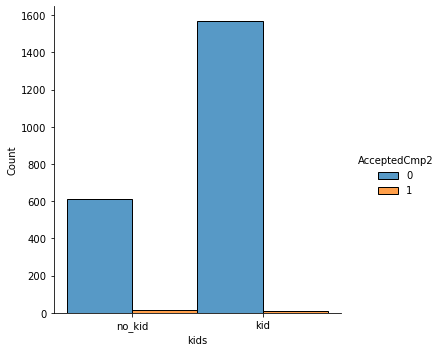

In [89]:
plt.figure(figsize=(6,3), dpi = 150)

ax3 = sns.displot(shopping_data_clean, x="kids", hue="AcceptedCmp2", multiple="dodge")

In der graphischen Darstellung wird ersichtlich, dass nicht viele Kunden ein Angebot aus der Amrketingkamagne wahrgenommen haben. Es scheinen jedoch mehr Kunden ohne Kindern gewesen zu sein als mit. Dafür schauen wir uns als nächstes noch die genauen Zahlen an und nach diesen scheint es dass mehr Kunden ohne Kinder ein Angebot der Kampagne angenommen haben, um danach den Chi-Square test anzuwenden.

In [101]:
# zunächste sortieren wir die Kunden aus welche die Kamgane nicht angenommen haben.
shopping_marketing = shopping_data_clean[shopping_data_clean['AcceptedCmp2'] == 1]

shopping_marketing.groupby('kids').AcceptedCmp2.count()


kids
kid       12
no_kid    18
Name: AcceptedCmp2, dtype: int64

In [102]:
from scipy.stats import chi2_contingency

In [106]:
shopping_chi_table = pd.crosstab(shopping_data_clean['AcceptedCmp2'], shopping_data_clean['kids'])
shopping_chi_table.head()

kids,kid,no_kid
AcceptedCmp2,,
0,1568,614
1,12,18


In [107]:
stat, p, dof, expected = chi2_contingency(shopping_chi_table)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')


p value is 0.00027997079712115797
Dependent (reject H0)


H0 wird abgelehnt und H1 angenommmen.Mehr Kunden ohne Kindern haben die Agebote aus der Kampagne angenommen.